In [46]:
""" libraries """
import numpy as AAPL__N
import pandas as AAPL__P
import matplotlib.pyplot as AAPL__M
import seaborn as S__Bz


In [47]:
# Importing dataset

time_data_APPL = AAPL__P.read_csv('AAPL.csv')

In [48]:
time_data_APPL

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086998,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600
...,...,...,...,...,...,...,...
10954,2024-05-28,191.509995,193.000000,189.100006,189.990005,189.990005,52280100
10955,2024-05-29,189.610001,192.250000,189.509995,190.289993,190.289993,53068000
10956,2024-05-30,190.759995,192.179993,190.630005,191.289993,191.289993,49947900
10957,2024-05-31,191.440002,192.570007,189.910004,192.250000,192.250000,75158300


In [49]:
# Checking for null values
time_data_APPL.isnull().sum()



Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [50]:
time_data_APPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10959 entries, 0 to 10958
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10959 non-null  object 
 1   Open       10959 non-null  float64
 2   High       10959 non-null  float64
 3   Low        10959 non-null  float64
 4   Close      10959 non-null  float64
 5   Adj Close  10959 non-null  float64
 6   Volume     10959 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 599.4+ KB


In [51]:
time_data_APPL['Date'] = AAPL__P.to_datetime(time_data_APPL['Date'])
# Set 'Date' column as the index
time_data_APPL.set_index('Date', inplace=True)


In [52]:
time_data_APPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10959.000000,10959.000000,10959.000000,10959.000000,10959.000000,1.095900e+04
mean,21.608308,21.840030,21.385337,21.621645,20.825444,3.189592e+08
std,44.595774,45.070213,44.151352,44.630298,44.179782,3.357150e+08
min,0.049665,0.049665,0.049107,0.049107,0.037900,0.000000e+00
25%,0.297154,0.303571,0.290179,0.296875,0.241667,1.138835e+08
50%,0.522321,0.533482,0.515625,0.524554,0.427557,2.066208e+08
75%,19.789285,19.960178,19.550179,19.755356,17.068634,3.992296e+08
max,198.020004,199.619995,197.000000,198.110001,197.589523,7.421641e+09


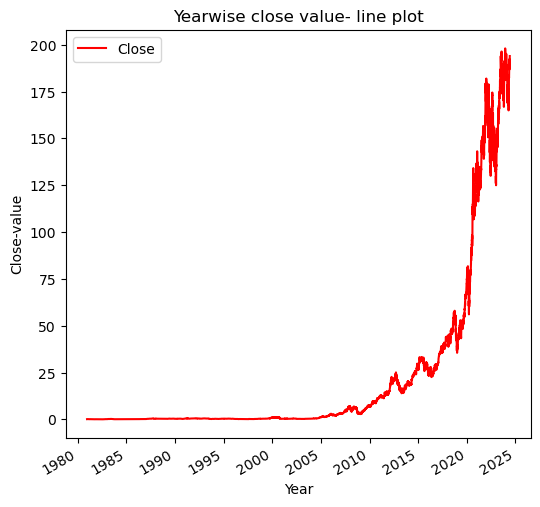

In [53]:
# Vislualizing the data


time_data_APPL.plot.line(y="Close", use_index=True,figsize=(6,6), color= 'red')
AAPL__M.xlabel('Year')
AAPL__M.ylabel('Close-value')
AAPL__M.title('Yearwise close value- line plot')
AAPL__M.show()

In [37]:
# Generate a complete range of business dates
all_business_dates = AAPL__P.date_range(start=time_data_APPL.index.min(), end=time_data_APPL.index.max(), freq='B')

# Identify missing dates
missing_dates = all_business_dates.difference(time_data_APPL.index)


In [38]:
# Create a DataFrame to store the missing dates and their days
missing_dates_df = AAPL__P.DataFrame(missing_dates, columns=['Date'])
missing_dates_df['Day'] = missing_dates_df['Date'].dt.day_name()
missing_dates_df['Month'] = missing_dates_df['Date'].dt.month_name()
missing_dates_df['Year'] = missing_dates_df['Date'].dt.year


In [39]:
# Print the missing dates along with days
print(missing_dates_df)

          Date       Day     Month  Year
0   1980-12-25  Thursday  December  1980
1   1981-01-01  Thursday   January  1981
2   1981-02-16    Monday  February  1981
3   1981-04-17    Friday     April  1981
4   1981-05-25    Monday       May  1981
..         ...       ...       ...   ...
378 2024-01-01    Monday   January  2024
379 2024-01-15    Monday   January  2024
380 2024-02-19    Monday  February  2024
381 2024-03-29    Friday     March  2024
382 2024-05-27    Monday       May  2024

[383 rows x 4 columns]


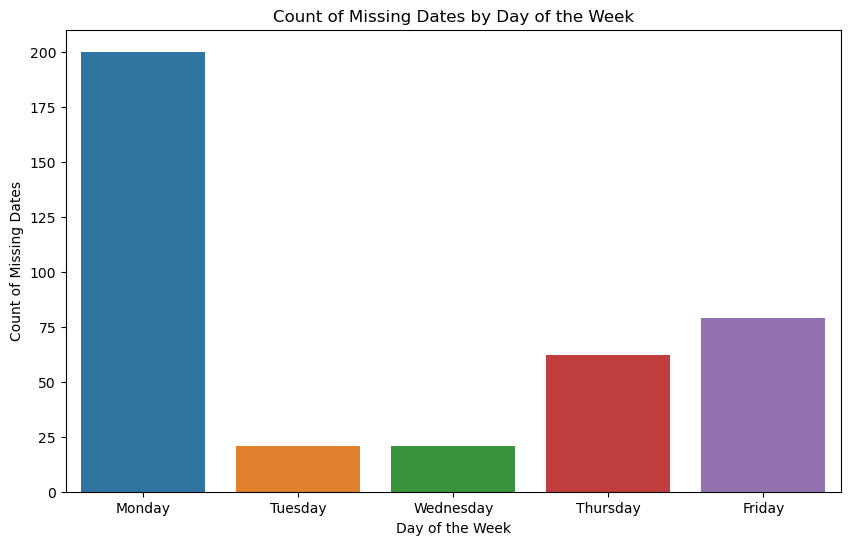

In [40]:
# 1. Count of missing dates by day of the week
AAPL__M.figure(figsize=(10, 6))
S__BORN.countplot(x='Day', data=missing_dates_df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
AAPL__M.title('Count of Missing Dates by Day of the Week')
AAPL__M.xlabel('Day of the Week')
AAPL__M.ylabel('Count of Missing Dates')
AAPL__M.show()

In [54]:
## normalization
from sklearn.preprocessing import MinMaxScaler as AAPL__G

val_Close = time_data_APPL['Close'].values
val_Close = val_Close.reshape((len(val_Close), 1))

scale_Close = AAPL__G(feature_range=(0, 1))
scale_Close = scale_Close.fit(val_Close)
nor_close= scale_Close.transform(val_Close)
nor_close

array([[4.00084027e-04],
       [3.66276242e-04],
       [3.21194147e-04],
       ...,
       [9.65566105e-01],
       [9.70413135e-01],
       [9.79400265e-01]])

In [56]:
# Create a DataFrame for the normalized 'Close' values with the same index as time_data_APPL
nor_close_df = AAPL__P.DataFrame(nor_close, index=time_data_APPL.index, columns=['Close'])
nor_close_df

,Close
Date,
1980-12-12,0.000400
1980-12-15,0.000366
1980-12-16,0.000321
1980-12-17,0.000335
1980-12-18,0.000352
...,...
2024-05-28,0.959003
2024-05-29,0.960517
2024-05-30,0.965566


In [57]:

# Update the 'Close' column in the original DataFrame with the normalized values
time_data_APPL['Close'] = nor_close_df['Close']
time_data_APPL['Close']

Date
1980-12-12    0.000400
1980-12-15    0.000366
1980-12-16    0.000321
1980-12-17    0.000335
1980-12-18    0.000352
                ...   
2024-05-28    0.959003
2024-05-29    0.960517
2024-05-30    0.965566
2024-05-31    0.970413
2024-06-03    0.979400
Name: Close, Length: 10959, dtype: float64

In [58]:
# Print the normalized DataFrame
print(time_data_APPL)

                  Open        High         Low     Close   Adj Close  \
Date                                                                   
1980-12-12    0.128348    0.128906    0.128348  0.000400    0.099058   
1980-12-15    0.122210    0.122210    0.121652  0.000366    0.093890   
1980-12-16    0.113281    0.113281    0.112723  0.000321    0.086998   
1980-12-17    0.115513    0.116071    0.115513  0.000335    0.089152   
1980-12-18    0.118862    0.119420    0.118862  0.000352    0.091737   
...                ...         ...         ...       ...         ...   
2024-05-28  191.509995  193.000000  189.100006  0.959003  189.990005   
2024-05-29  189.610001  192.250000  189.509995  0.960517  190.289993   
2024-05-30  190.759995  192.179993  190.630005  0.965566  191.289993   
2024-05-31  191.440002  192.570007  189.910004  0.970413  192.250000   
2024-06-03  192.899994  194.990005  192.520004  0.979400  194.029999   

               Volume  
Date                   
1980-12-12  469

In [44]:
time_data_APPL['Close']= AAPL__P.DataFrame(nor_close)
time_data_APPL # normalized dataframe

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,NaN,0.099058,469033600
1980-12-15,0.122210,0.122210,0.121652,NaN,0.093890,175884800
1980-12-16,0.113281,0.113281,0.112723,NaN,0.086998,105728000
1980-12-17,0.115513,0.116071,0.115513,NaN,0.089152,86441600
1980-12-18,0.118862,0.119420,0.118862,NaN,0.091737,73449600
...,...,...,...,...,...,...
2024-05-28,191.509995,193.000000,189.100006,NaN,189.990005,52280100
2024-05-29,189.610001,192.250000,189.509995,NaN,190.289993,53068000
2024-05-30,190.759995,192.179993,190.630005,NaN,191.289993,49947900


In [59]:
def defnition_of_function_Model(AAPL__sequ, AAPL__n_ste):
  variable_x_AAPL, variable_y_AAPL = [], []

  for FOR in range(len(AAPL__sequ)):
    Addition = FOR + AAPL__n_ste
    if Addition > len(AAPL__sequ)-1:
      break
    x_AAPL, y_AAPL = AAPL__sequ[FOR:Addition], AAPL__sequ[Addition]
    variable_x_AAPL.append(x_AAPL)
    variable_y_AAPL.append(y_AAPL)
  return AAPL__N.array(variable_x_AAPL), AAPL__N.array(variable_y_AAPL)

In [60]:
## training & testing data separation using n_step=30 ##
AAPL__n_ste = 30

variable_x_AAPL_TN, variable_y_AAPL_TN = defnition_of_function_Model(time_data_APPL['Close'][:-500].tolist(), AAPL__n_ste)
variable_x_AAPL_TS, variable_y_AAPL_TS = defnition_of_function_Model(time_data_APPL['Close'][-500:].tolist(), AAPL__n_ste)
for total in range(len(variable_x_AAPL_TS)):
  print(variable_x_AAPL_TS[total], variable_y_AAPL_TS[total])


[0.75058179 0.74679507 0.71993461 0.69211491 0.66560791 0.67005094
 0.68353163 0.65641878 0.66399221 0.68575318 0.68312778 0.69787071
 0.71498666 0.71498666 0.69368007 0.70271767 0.69004482 0.70120296
 0.71448173 0.72134831 0.73866626 0.74214997 0.73119375 0.73619224
 0.73432415 0.74937001 0.75795321 0.74230151 0.76214385 0.77244368] 0.7841068262571813
[0.74679507 0.71993461 0.69211491 0.66560791 0.67005094 0.68353163
 0.65641878 0.66399221 0.68575318 0.68312778 0.69787071 0.71498666
 0.71498666 0.69368007 0.70271767 0.69004482 0.70120296 0.71448173
 0.72134831 0.73866626 0.74214997 0.73119375 0.73619224 0.73432415
 0.74937001 0.75795321 0.74230151 0.76214385 0.77244368 0.78410683] 0.7777450959097458
[0.71993461 0.69211491 0.66560791 0.67005094 0.68353163 0.65641878
 0.66399221 0.68575318 0.68312778 0.69787071 0.71498666 0.71498666
 0.69368007 0.70271767 0.69004482 0.70120296 0.71448173 0.72134831
 0.73866626 0.74214997 0.73119375 0.73619224 0.73432415 0.74937001
 0.75795321 0.74230151

In [65]:
print("X_train: ", variable_x_AAPL_TN.shape)
print("X_test: ", variable_x_AAPL_TS.shape)

# Get the date index for the specified range and convert to strings
time_data_APPL_DT = time_data_APPL.index[-500:-30].tolist()

X_train:  (10429, 30)
X_test:  (470, 30)


In [61]:

print("X_train: ", variable_x_AAPL_TN.shape)
print("X_test: ", variable_x_AAPL_TS.shape)
time_data_APPL_DT=(time_data_APPL['Date'][-500:-30].tolist())

X_train:  (10429, 30)
X_test:  (470, 30)


KeyError: 'Date'